# GLLBSC Functional Calculation
## Calculting Fundamental band gap along with Bandstructure

In [1]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [2]:
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import read
from ase.build import bulk
from ase.optimize import BFGS
from ase.optimize import BFGSLineSearch
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
from ase.dft.dos import DOS
from ase.constraints import UnitCellFilter
from ase.build import mx2
from gpaw import *
from ase.constraints import StrainFilter
from gpaw.xc.vdw import VDWFunctional
'''
atoms=read('MoSWSe.traj')
calc = GPAW(mode=PW(600),
            xc='GLLBSC',
            nbands=70,
            convergence={'bands': -20},
            setups={'Mo, W': '6'},      
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.01),
            kpts={'size': (42, 42, 1), 'gamma': True})  
atoms.calc = calc
atoms.get_potential_energy()
calc.write('gs_gllbsc.gpw', mode='all')
'''
atoms, calc=restart('gs_gllbsc.gpw')

In [3]:
# OK, sanity checks on that calculation!
# What is the band-gap, and does it look sensible?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(atoms.calc)
# Output is the gap in eV
# and from where the VBM in k-space is, and where the CBM is.
# From here you can appreciate whether the material is direct or not.

Gap: 0.457 eV
Transition (v -> c):
  (s=0, k=602, n=25, [0.33, 0.33, 0.00]) -> (s=0, k=602, n=26, [0.33, 0.33, 0.00])


MCLC(a=3.25204, b=5.63306, c=15.9495, alpha=89.9863)
  Variant name: MCLC1
  Special point names: GNN1FF1F2F3II1LMXX1X2YY1Z
  Default path: GYFLI,I1ZF1,YX1,XGN,MG

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    N   0.5000  0.0000  0.0000
    N1  0.0000 -0.5000  0.0000
    F   0.5000  0.5000  0.4993
    F1  0.5000  0.5000  0.5007
    F2 -0.5000 -0.5000  0.4993
    F3  0.5000 -0.5000  0.4993
    I   0.6667  0.3333  0.5000
    I1  0.3333 -0.3333  0.5000
    L   0.5000  0.5000  0.5000
    M   0.5000  0.0000  0.5000
    X   0.3333 -0.3333  0.0000
    X1  0.6667  0.3333  0.0000
    X2 -0.3333 -0.6667  0.0000
    Y   0.5000  0.5000  0.0000
    Y1 -0.5000 -0.5000  0.0000
    Z   0.0000  0.0000  0.5000



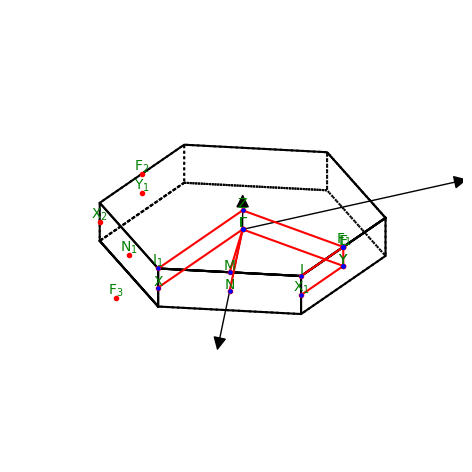

<Axes3DSubplot:>

In [4]:
# OK! Luckily ASE knows all about space groups and the reciprocal lattice.
# So let's ask it what it knows about this one, and a suggested high-symmetry path.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.0
 |___|_|             

User:   tewodros@tewodros-HP-Pavilion-Laptop-14-bf0xx
Date:   Thu Nov 20 19:54:21 2025
Arch:   x86_64
Pid:    16309
CWD:    /home/tewodros/Desktop/Hetrostructure/HTR/revised/HTR/T1_2H/MoS2-WSe2/functionals
Python: 3.7.12
gpaw:   /home/tewodros/miniconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/tewodros/miniconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/tewodros/miniconda3/lib/python3.7/site-packages/ase (version 3.22.1)
numpy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/numpy (version 1.21.6)
scipy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/scipy (version 1.7.3)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: -20,
                density: 0.0001,
                eigenstates: 4e-08,
                energy: 0.0005}
  gpt

     iter     time        total  log10-change:
                         energy  eigst   dens
iter:   1 19:57:02   -47.018191  +2.09       c
iter:   2 19:58:17   -47.052007  +0.52       c
iter:   3 19:59:33   -47.053261  -0.53       c
iter:   4 20:00:47   -47.053354c -1.49       c
iter:   5 20:02:03   -47.053362c -2.32       c
iter:   6 20:03:16   -47.053363c -3.21       c
iter:   7 20:04:32   -47.053364c -4.19       c
iter:   8 20:05:47   -47.053364c -5.21       c
iter:   9 20:06:48   -47.053364c -6.22       c
iter:  10 20:07:47   -47.053364c -7.22       c
iter:  11 20:08:46   -47.053364c -8.21c      c

Converged after 11 iterations.

Dipole moment: (1.481791, -4.335240, -0.060515) |e|*Ang

Energy contributions relative to reference atoms: (reference = -702513.752309)

Kinetic:       +109.474757
Potential:     -114.821023
External:        +0.000000
XC:             -42.226995
Entropy (-ST):   -0.000000
Local:           +0.519897
--------------------------
Free energy:    -47.053364
Extr

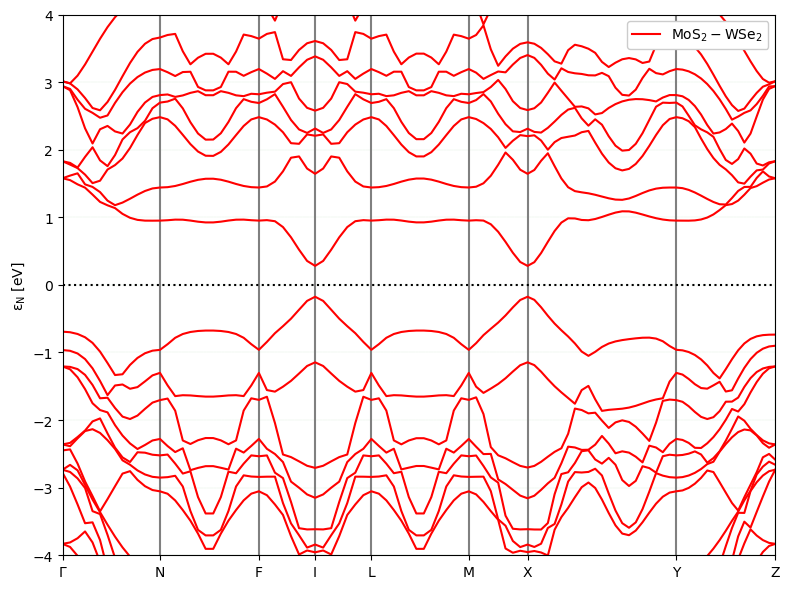

In [5]:
bs_calc = calc.fixed_density(kpts={'path': 'GNFILMXYZ', 'npoints': 100}, symmetry='off')
 # path through k-space taken from Materials project; or from analysis above

bs_calc.get_potential_energy() # eval at these k-point path
bs = bs_calc.band_structure().subtract_reference()
#bs=bs_calc.band_structure() # generate the plot object
#bs.ylabel(r'$\varepsilon_N(k)$ [eV]', size=24)
bs.plot(ylabel=r'$\mathrm{\varepsilon_N}$ [eV]', label=r'$\mathrm{MoS_{2}-WSe_{2}}$', loc="upper right", color='r', emax=4, emin=-4)
plt.grid(which='major', axis='both', zorder=-1.0, color = 'green', linestyle = '--', linewidth = 0.05)
plt.tight_layout()
#plt.savefig('MoS2-WSe2.eps')
plt.show()

In [6]:
# Get the accurate HOMO and LUMO from the band structure calculator
homo, lumo = bs_calc.get_homo_lumo()

# Calculate the discontinuity potential using the ground state calculator and
# the accurate HOMO and LUMO
response = calc.hamiltonian.xc.response
dxc_pot = response.calculate_discontinuity_potential(homo, lumo)

# Calculate the discontinuity using the band structure calculator
bs_response = bs_calc.hamiltonian.xc.response
KS_gap, dxc = bs_response.calculate_discontinuity(dxc_pot)

In [7]:
# Derivative discontinuity
dxc

0.15810589396617364

In [8]:
KS_gap

0.45668246855394284

In [9]:
# Fundamental band gap = Kohn-Sham band gap + derivative discontinuity
QP_gap = KS_gap + dxc
QP_gap

0.6147883625201165